In [1]:
import data_processing
import model_train
import model_test

### Hyperparameters optimization - looking for the best ones

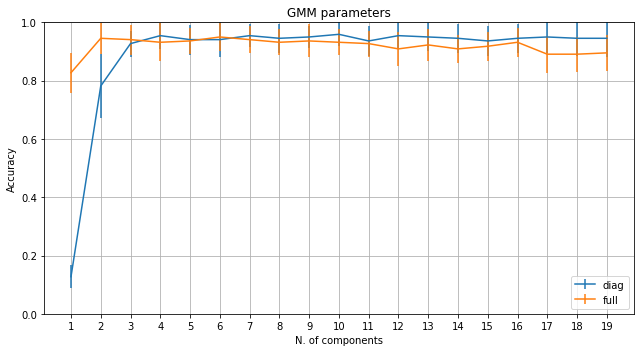

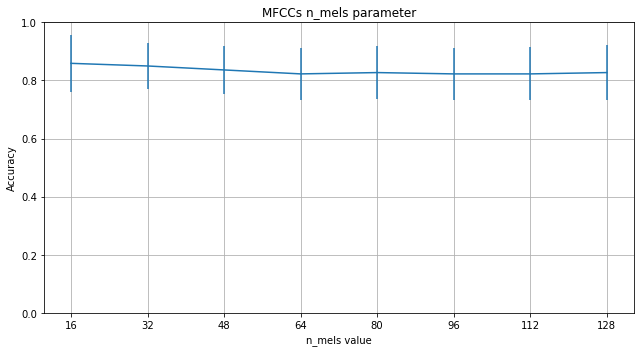

Classification accuracy without deltas of MFCCs: 0.814
Classification accuracy with deltas of MFCCs: 0.955
{'n_components': 10, 'covariance_type': 'diag'}
{'n_mfcc': 13, 'n_fft': 512, 'hop_length': 160, 'win_length': 320, 'window': 'hamming', 'n_mels': 16}


In [2]:
mfccs_arguments = {'n_mfcc': 13, 'n_fft': 512, 'hop_length': 160, 'win_length': 320, 'window': 'hamming'}

speaker_files = data_processing.load_wav_files('train')
best_gmm_params = model_test.test_gmm_params(speaker_files, 11, range(1, 20), ['diag', 'full'], cmv_norm=True, **mfccs_arguments)
mfccs_arguments['n_mels'] = model_test.test_mfcc_params(speaker_files, 11, 'n_mels', range(16, 9*16, 16), cmv_norm=False, **mfccs_arguments)
deltas = model_test.test_mfcc_deltas(speaker_files, 11, cmv_norm=False)

print(best_gmm_params)
print(mfccs_arguments)

### Cross-validation on training data

In [3]:
speaker_mfccs = data_processing.generate_speaker_mfccs(speaker_files, cmv_norm=True, deltas=deltas, **mfccs_arguments)

final_test = model_test.cross_validate(speaker_mfccs, 11, **best_gmm_params)
print("Classification accuracy: {:.3f}".format(final_test[0]))

Classification accuracy: 0.973


### Model training with optimized hyperparameters and evalualuation using validation data from the same dataset and unknow data collected from various people. Generating spreadsheet with predictions that will be used for evaluation

In [14]:
speaker_files = data_processing.load_wav_files('train')
speaker_mfccs = data_processing.generate_speaker_mfccs(speaker_files, cmv_norm=True, deltas=True, **mfccs_arguments)
digits_mfccs = data_processing.generate_digits_mfccs(speaker_mfccs)

gmms = model_train.train_gmms(digits_mfccs, **best_gmm_params)
model_test.evaluate(gmms, 'eval', 'results.csv', cmv_norm=True, deltas=True, **mfccs_arguments)
model_test.evaluate(gmms, 'eval_ia', 'results_ia.csv', cmv_norm=True, deltas=True, **mfccs_arguments)

### Evaluation

Classification accuracy based on 'results.csv': 93.50%
Classification F1-score based on 'results.csv': 0.936


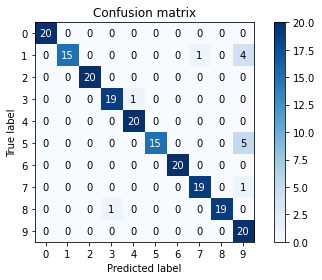

Classification accuracy based on 'results_ia.csv': 70.45%
Classification F1-score based on 'results_ia.csv': 0.711


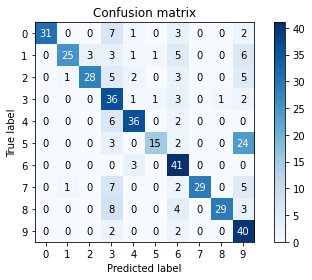

In [15]:
from eval import evaluate # Evaluation script not included in repo
evaluate('results.csv')
evaluate('results_ia.csv')